In [0]:
!pip install web3==4.2.1
from web3 import Web3 
web3 = Web3(Web3.HTTPProvider("API"))

In [0]:
%%time
n = 8959400
blocks_gas = []
blocks_gasPrice = []
blocks_contracts = []

# за каждый блок майнер получает 2 эфира
for i in range(1001):
  gas = []
  price = []
  kontr = 0
  for trans in web3.eth.getBlock(n + i)['transactions']:
    tr = web3.eth.getTransaction(trans)
    tr_r = web3.eth.getTransactionReceipt(trans)
    gas.append(tr_r['gasUsed'])
    price.append(tr['gasPrice'])
    if tr['input'] != '0x':
      kontr+=1
    
  blocks_gas.append(gas)
  blocks_gasPrice.append(price)
  blocks_contracts.append(kontr)
print("Hooraaaay")

Hooraaaay
CPU times: user 19min 10s, sys: 53.3 s, total: 20min 4s
Wall time: 8h 11min 43s


In [0]:
%%time
file = open('Blocks_info.txt', 'w')
n = 8959400
blocks_kom = []
blocks_otn = []
blocks_num = []
trans_count = []
for i in range (1001):
  kom = 0
  trans_c = len(blocks_gas[i])
  for j in range(len(blocks_gas[i])):
    kom += (blocks_gas[i][j]*blocks_gasPrice[i][j])/(10**18)
  blocks_num.append(n+i)
  blocks_otn.append(float("{0:.2f}".format(kom*100/(kom + 2))))
  blocks_kom.append(float ("{0:.2f}".format(kom + 2)))
  trans_count.append(trans_c)
  file.write(str(i + n) + ',' + str(kom + 2) + ',' + str(kom*100/(kom + 2)) + ',' + str(blocks_contracts[i]) + '\n')  
file.close()
print(blocks_num)
print(blocks_otn)
print(blocks_kom)
print(trans_count)

[8959400, 8959401, 8959402, 8959403, 8959404, 8959405, 8959406, 8959407, 8959408, 8959409, 8959410, 8959411, 8959412, 8959413, 8959414, 8959415, 8959416, 8959417, 8959418, 8959419, 8959420, 8959421, 8959422, 8959423, 8959424, 8959425, 8959426, 8959427, 8959428, 8959429, 8959430, 8959431, 8959432, 8959433, 8959434, 8959435, 8959436, 8959437, 8959438, 8959439, 8959440, 8959441, 8959442, 8959443, 8959444, 8959445, 8959446, 8959447, 8959448, 8959449, 8959450, 8959451, 8959452, 8959453, 8959454, 8959455, 8959456, 8959457, 8959458, 8959459, 8959460, 8959461, 8959462, 8959463, 8959464, 8959465, 8959466, 8959467, 8959468, 8959469, 8959470, 8959471, 8959472, 8959473, 8959474, 8959475, 8959476, 8959477, 8959478, 8959479, 8959480, 8959481, 8959482, 8959483, 8959484, 8959485, 8959486, 8959487, 8959488, 8959489, 8959490, 8959491, 8959492, 8959493, 8959494, 8959495, 8959496, 8959497, 8959498, 8959499, 8959500, 8959501, 8959502, 8959503, 8959504, 8959505, 8959506, 8959507, 8959508, 8959509, 8959510, 

No handles with labels found to put in legend.


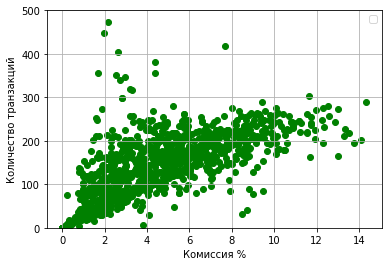

In [0]:
import matplotlib.pyplot as plt
plt.scatter(blocks_otn, trans_count, color = 'g')
plt.xlabel('Комиссия %')
plt.ylabel('Количество транзакций')
plt.ylim(0, 500)
plt.grid()
plt.legend()
plt.show()

No handles with labels found to put in legend.


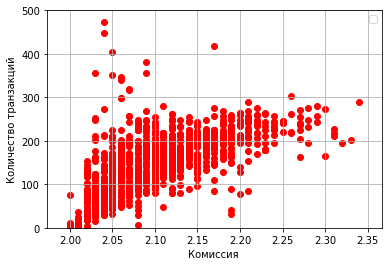

In [0]:
plt.scatter(blocks_kom, trans_count, color = 'r')
plt.xlabel('Комиссия ')
plt.ylabel('Количество транзакций')
plt.ylim(0, 500)
plt.grid()
plt.legend()
plt.show()

In [0]:
web3.eth.getBlock(1000000)

In [0]:
web3.eth.getTransaction('0xea1093d492a1dcb1bef708f771a99a96ff05dcab81ca76c31940300177fcf49f')

AttributeDict({'blockHash': HexBytes('0x8e38b4dbf6b11fcc3b9dee84fb7986e29ca0a02cecd8977c161ff7333329681e'),
 'blockNumber': 1000000,
 'from': '0x39fA8c5f2793459D6622857E7D9FbB4BD91766d3',
 'gas': 129244,
 'gasPrice': 80525500000,
 'hash': HexBytes('0xea1093d492a1dcb1bef708f771a99a96ff05dcab81ca76c31940300177fcf49f'),
 'input': '0x',
 'nonce': 21,
 'r': HexBytes('0xa254fe085f721c2abe00a2cd244110bfc0df5f4f25461c85d8ab75ebac11eb10'),
 's': HexBytes('0x30b7835ba481955b20193a703ebc5fdffeab081d63117199040cdf5a91c68765'),
 'to': '0xc083e9947Cf02b8FfC7D3090AE9AEA72DF98FD47',
 'transactionIndex': 0,
 'v': 28,
 'value': 100000000000000000000})

nonce – количество транзакций, которые были отправлены отправителем.

to – адрес получателя

value – количество Wei, которые будут переданы от отправителя к получателю.

v, r, s – данные обозначения, используемые для создания подписи, которая идентифицирует отправителя транзакции.